In [26]:
#  Импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [12]:
#  Импортируем данные
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [5]:
#  Проверяем размер таблиц, типы переменных, наличие пропущенных значений, описательную статистику.
    # user_data
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [6]:
     # logs
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [ ]:
#  Количество ненулевых значений в каждой строке совпадает с количеством строк в таблице, следовательно, нулевых значений нет

In [43]:
# Какой клиент совершил больше всего успешных операций? (success == True)
client_succ = logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success' : 'count'}) \
    .rename(columns = {'success' : 'count_success'}) \
    .sort_values('count_success', ascending = False)
client_max_succ = client_succ.query('count_success == 41') \
    .sort_values('client')
client_max_succ['client'].tolist()


[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [19]:
# С какой платформы осуществляется наибольшее количество успешных операций?
platform_max_succ = logs.query('success == True') \
    .groupby('platform', as_index = False) \
    .agg({'success' : 'count'}) \
    .rename(columns = {'success' : 'count_platform'}) \
    .sort_values('count_platform', ascending = False) \
    .head(1)
platform_max_succ

,platform,count_platform
1,phone,2019


In [17]:
#  Какую платформу предпочитают премиумные клиенты?
platform_pref_vip_cli = logs.merge(user_data) \
    .query('premium == True') \
    .groupby('platform', as_index = False) \
    .agg({'success' : 'count'}) \
    .rename(columns = {'success' : 'count_platform'}) \
    .sort_values('count_platform', ascending = False) \
    .head(1)
platform_pref_vip_cli

,platform,count_platform
1,phone,246


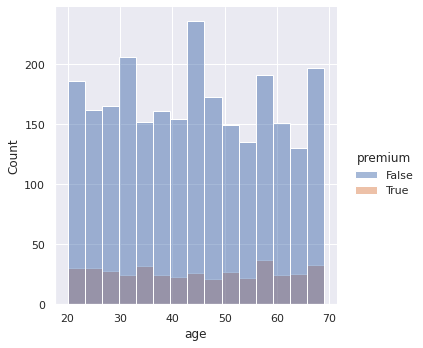

In [41]:
#  Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
sns.displot(data = user_data, x="age", hue="premium")

In [48]:
count_client_succ = client_succ.groupby('count_success', as_index = False).agg({'client' : 'count'})
count_client_succ

,count_success,client
0,1,2791
1,2,43
2,3,1
3,40,1
4,41,9


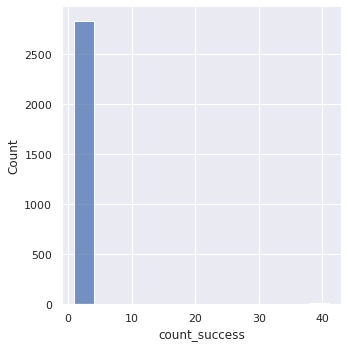

In [46]:
# Постройте график распределения числа успешных операций
sns.displot(client_succ, x="count_success")

In [53]:
#  Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. 
#  По оси x – возраст, y – число успешных операций. 
#  Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 
plt.figure(figsize=(12, 8))
computer_age_success = logs.merge(user_data, on = 'client') \
    .query('platform == "computer" and success == True')
sns.countplot(computer_age_success, x = 'age')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 864x576 with 0 Axes>